In [1]:
# Key Insights

# Ways not good or recommended for weight Initialisation

# 1. We should not initialise weights/ bias by 0 as it will make neuron dead
# 2. Non-Zero Constant Initialisation will give the same result as above 
# 3. Random Initialisation with small weights will result in 
#    Vanishing Gradient in the case of tanh/ sigmoid and 
#    very slow convergence in case of reLu activation
# 4. Random initialisation with large weights will result in sudden jump of the gradients 
#    which will not let the model to reach convergence

In [3]:
# Now there is some solution which can be helpful in weight initialisation

# 1. Xavier/Glorat Initialisation  (gives better result with tanh)
# 1.1 Normal 
# 1.2 Uniform

# 2. He Initialisation  (gives better results with He)
# 2.1 Normal 
# 2.2 Uniform

In [4]:
# random value initialization = random value * sqrt(1/n) 
# where n is the number of inputs given to that node

# Instead of using a fixed number the multiplier is depedent on the number of
# inputs a node get

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv(r'ushape.csv', names=['X','y','class'])

In [14]:
df.head()

,X,y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


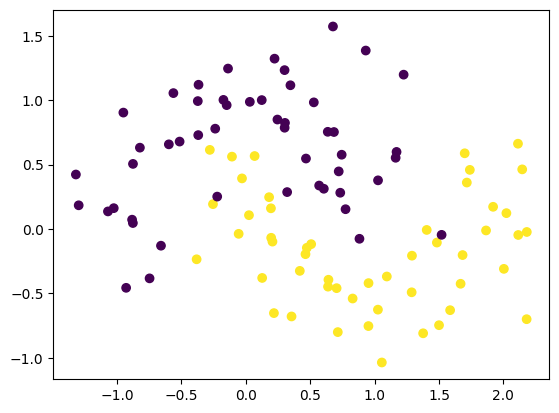

In [16]:
plt.scatter(df['X'],df['y'],c=df['class'])

In [17]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [21]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Input

In [23]:
model = Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.get_weights()

[array([[-0.524076  , -0.049389  ,  0.42814654,  0.15569836, -0.40951192,
          0.6705772 ,  0.6616463 ,  0.6063015 , -0.41354588, -0.16364169],
        [ 0.30368048,  0.31408864, -0.01186872, -0.6526011 ,  0.5256304 ,
          0.4403575 , -0.48652518, -0.19283718,  0.31737727, -0.1113683 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.40248448,  0.50746405, -0.41834196,  0.06967115,  0.06935239,
         -0.16930571, -0.34720093,  0.38754255, -0.4469424 ,  0.4477532 ],
        [-0.49693185,  0.17406428,  0.5284076 , -0.4824484 , -0.4726984 ,
          0.06454039,  0.28243512,  0.31432647, -0.02039331,  0.18008882],
        [-0.5301272 , -0.15369675, -0.4766292 , -0.27149817,  0.05669796,
          0.22714657,  0.18659008, -0.01029223,  0.22200185, -0.528134  ],
        [ 0.0686453 , -0.05762762,  0.08029038, -0.0247131 ,  0.49350035,
         -0.00198346,  0.2974717 , -0.22768772,  0.16470486,  0.3997128 ],
        [-0.34865

In [25]:
initial_weights = model.get_weights()

In [26]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [27]:
model.set_weights(initial_weights)

In [28]:
model.get_weights()

[array([[-0.6075968 ,  0.42971385,  0.08224516,  0.3097582 ,  0.15975718,
         -0.7222899 ,  0.18286182,  0.36842027,  0.01946837,  0.62333596],
        [-0.478389  ,  0.13130338, -1.921219  ,  0.07742291,  0.5170132 ,
          0.5562461 ,  1.2735287 ,  0.9485489 ,  1.6702068 , -0.56413376]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.34769222, -0.45767573, -0.59637356,  0.16263767, -0.05117852,
          0.13967216,  0.45810816,  0.02503301,  0.33700404,  0.43583247],
        [ 0.12735127, -0.02739132,  0.13025841, -0.00365814, -0.02618111,
          0.5147143 , -0.18626691, -0.16344346,  0.75815576, -0.15316698],
        [ 0.04479932,  0.92731315, -0.298075  ,  1.0443395 , -0.09710329,
         -0.1210582 ,  0.26973513, -0.02057089,  0.51059824, -0.08100989],
        [-0.42713752, -0.41825202, -0.8886034 ,  0.4996024 ,  0.01526961,
          0.1369425 , -0.44364488, -0.12268914, -0.11559203,  0.41265634],
        [ 0.20132

In [29]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
history = model.fit(X,y,epochs=300,validation_split=0.2, verbose=0)

In [41]:
model.get_weights()

[array([[-0.7313477 ,  0.57432204,  0.16728741,  0.8020189 ,  0.5990666 ,
         -0.6201923 ,  0.3041378 ,  0.64422095,  0.0057237 ,  0.5881258 ],
        [-0.40224165, -0.06023455, -2.0911133 ,  0.10156491,  0.4658434 ,
          0.68039477,  1.1161959 ,  0.9422336 ,  2.010678  , -0.7448732 ]],
       dtype=float32),
 array([-0.31130397, -0.2519496 ,  0.291198  ,  0.10615163, -0.46310124,
         0.11018365, -0.05850928, -0.19878815, -0.13466641, -0.20282403],
       dtype=float32),
 array([[ 0.25275975, -0.46193314, -0.42337215,  0.1630066 ,  0.28519428,
          0.1063647 ,  0.45573267,  0.25461784,  0.46896446,  0.30000585],
        [ 0.2822368 , -0.17575185,  0.01051078,  0.02223573, -0.82411903,
          0.6920313 , -0.17905986, -0.43403247,  0.6313414 , -0.1122164 ],
        [ 0.00990432,  0.99431145, -0.10324359,  1.0313213 , -0.26491207,
         -0.21325466,  0.36889777, -0.05806322,  0.58876634, -0.19687513],
        [-0.2876307 , -0.5020028 , -1.0850599 ,  0.4232046 , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

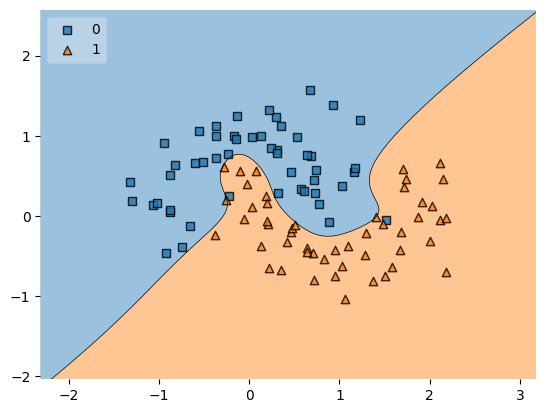

In [42]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [43]:
(np.random.randn(10,10)*0.01).min()

np.float64(-0.020188769504981968)

In [44]:
(np.random.randn(10,10)*0.01).max()

np.float64(0.02626695429704943)

In [ ]:
#  multiplier to be used in He Initialisation technique

# sqrt(2/fan_in) where fan_in is the number of inputs to the node

In [45]:
# Now for uniform Distribution

#  Xavier uniform

# [-limit, limit] for the model weights

# limit = sqrt(6/ (fan_in + fan_out))


# He Uniform

# [-limit , limit]

# limit = sqrt(6/fan_in)


# In Keras use kernel_initializer in the model.add part 

In [46]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.get_weights()

[array([[-0.76957357, -0.9270264 , -0.01804463,  0.04593617, -0.5345362 ,
         -0.45774513, -1.016804  , -0.00768404,  1.3169068 ,  1.4518352 ],
        [ 0.7423725 ,  0.43016386, -0.5564581 ,  0.43750054, -0.7858646 ,
         -2.061112  ,  1.5548104 , -0.7177186 , -1.2600638 , -1.1561073 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.4437216 ,  0.53112566, -0.86905617,  0.17669652,  0.9578744 ,
         -0.17949899, -0.40516683,  0.9533794 ,  0.89872074, -0.37931427],
        [ 0.50703394, -0.1737833 , -0.21381843,  0.3992915 , -0.425903  ,
          0.17165643, -0.24004598,  0.27212664,  0.5594767 ,  0.00909935],
        [ 0.16367781, -0.5009631 , -0.17156266, -0.21861146, -0.04876688,
         -0.19697022, -0.83993495,  0.82230854, -0.86430186, -0.18933515],
        [ 0.39241472, -0.50198126, -0.85581905, -0.72602874, -0.20509449,
          0.35606468,  0.3481953 ,  0.8409653 ,  0.74632716, -0.52941036],
        [-0.53693

In [48]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [51]:
history = model.fit(X,y,epochs=100,validation_split=0.2, verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

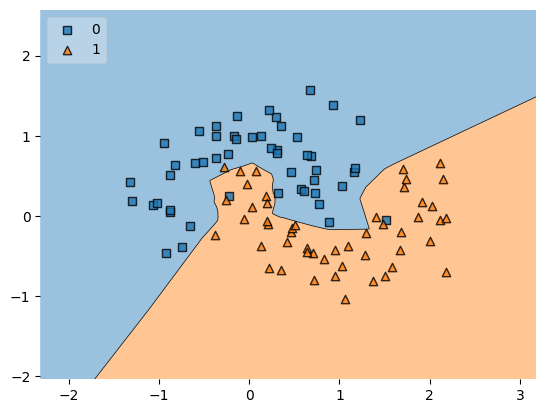

In [52]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)